<div style="display: block; width: 100%; height: 120px;">

<p style="float: left;">
    <span style="font-weight: bold; line-height: 24px; font-size: 16px;">
        DIGHUM160 - Critical Digital Humanities
        <br />
        Digital Hermeneutics 2019
    </span>
    <br >
    <span style="line-height: 22x; font-size: 14x; margin-top: 10px;">
        Week 1 Exercises - INTERMEDIATE <br />
        Created by Tom van Nuenen (tom.van_nuenen@kcl.ac.uk) 
    </span>
</p>

<img style="width: 240px; height: 120px; float: right; margin: 0 0 0 0;" src="http://www.merritt.edu/wp/histotech/wp-content/uploads/sites/275/2018/08/berkeley-logo.jpg" />
</div>

# Welcome!

In this Notebook we will go over some of the things you have learned in the past month. 
Feel free to collaborate with each other in order to answer these questions--but *don't copy them from other assignments*! You'll rob yourself of a learning experience ;) 

## 1. Working with .txt files

Write a small utility function `read_file(filename)` that reads a specified file and simply returns all contents as a single string. Use it to read the example file 'test.txt' and save it in the variable `test`.

In [2]:
# Define your function here
def read_file(filename):
    "Read the contents of FILENAME and return as a string."
    infile = open(filename) 
    contents = infile.read()
    infile.close()
    return contents

In [12]:
# Run your function here
test = read_file('test.txt')

Now, we are going to create a function `split_sentences` that performs some very simple sentence splitting when passed a text string. Each sentence will be represented as a new string, so the function as a whole returns a list of sentence strings. We assume that any occurrence of either  . or ! or ? marks the end of a sentence.

First, create a function called `end_of_sentence_marker` that takes as argument a character and returns True if it is an end-of-sentence marker, otherwise it returns False.

In [6]:
# Define your function here
def end_of_sentence_marker(character):
    # insert your code here
    return character in '!?.'

# these tests should return True if your code is correct
print(end_of_sentence_marker("?") == True)
print(end_of_sentence_marker("a") == False)

True
True


An important function we will use is the built in `enumerate`. `enumerate` takes as argument any iterable (a string a list etc.). Let's see it in action:

In [8]:
for i, character in enumerate("Python"):
    print(i, character)

0 P
1 y
2 t
3 h
4 o
5 n


As you can see, enumerate allows you to iterate over an iterable and for each element in that iterable, it gives you its corresponding index. 

Now we can create our function `split_sentences`. It takes as argument a text represented by a simple string. 

Within `split_sentences`, define a variable 'sentences' in which to store the individual sentences (use a list!). 
Next, define a variable `start` and set it to zero. We're doing this as we need to extract both the start position and the end position of each sentence, and we know that the first sentence will always start at position 0.

Next, use `enumerate` to *loop* over all individual characters in the text. 
Remember that enumerate returns pairs of indexes and their corresponding elements (here characters). For each character we check whether it is an end-of-sentence marker. If it is, the variable end marks the position in text where a sentence ends. 

In [9]:
def split_sentences(text):
    "Split a text string into a list of sentences."
    sentences = []
    start = 0
    for end, character in enumerate(text):
        if end_of_sentence_marker(character):
            sentence = text[start: end + 1]
            sentences.append(sentence)
            start = end + 1
    return sentences

Now, let's see if our `split_sentences` function runs by running it. Use your `test` variable as the argument and save the output in a variable named `split`.

In [28]:
# Run your code here
split = split_sentences(test)

Finally, let's visualize some of these results. We'll create a new variable called `sentence_length`, assigning an empty list to it. We'll then loop over our `split` variable, containing all sentences in our test file, and add the length of each sentence to the `sentence_length` variable (tip: use the built-in `len()` function).

In [29]:
sentence_length = []
for i in split:
    sentence_length.append(len(i))

Finally, we'll import matplotlib and plot `sentence_length`. If you did everything right, the below code should give you a graph of the sentence lengths!

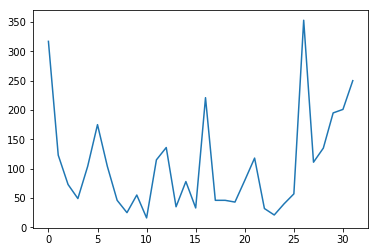

In [32]:
import matplotlib.pyplot as plt

plt.plot(sentence_length)

## 2. Working with Pandas

Next, we'll import a .csv into a Pandas dataframe. Import Pandas and use the read_csv function to open the example file 'AskTrumpSupporters.csv'. 
Then, show the first few lines of the dataframe (using the `.head()` function).

In [13]:
# Your code here
import pandas as pd

df = pd.read_csv("AskTrumpSupporters.csv") 
df.head()

,no.,url,date,author,score,title,body,comments
0,1,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-22,MarsNirgal,13,Is there a control or solution for the things ...,"Again, I'm assuming that there are things Trum...",AskTrumpSupporters is designed to provide a wa...
1,2,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-21,C137-Morty,239,Do you agree with Rand Paul that we should sto...,He said in an interview with Chris Wallace tha...,AskTrumpSupporters is designed to provide a wa...
2,3,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-21,56784rfhu6tg65t,7,Is the rise of groups like antifa a result of ...,Do you think groups like antifa would be as pr...,AskTrumpSupporters is designed to provide a wa...
3,4,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-21,ButAleppo,108,Trump is going to pull us out of a intermediat...,Read this on AOL: [https://www.aol.com/article...,AskTrumpSupporters is designed to provide a wa...
4,5,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-21,greyzcale,2,"Do you have experience with MDMA/ecstacy, or o...",I've seen lots of liberal leaning people use M...,AskTrumpSupporters is designed to provide a wa...


Now, write a function `tokenizer()` that takes as input a string. Make sure that the function:

- turns the string into lower case 
- cleans up punctuation (you can use regex, a custom list, or the inbuilt `string.punctuation` package)
- Puts al words in a list
- returns said list

In [24]:
import string
def tokenizer(text):
    '''cleans up and tokenizes input string'''
    text = text.lower()
    bad_chars = ['\n', '\t', '”', '“']
    textClean = text.translate(str.maketrans({ch: " " for ch in bad_chars}))
    table = str.maketrans({ch: None for ch in string.punctuation})
    no_punct = (s.translate(table) for s in textClean.split(' ') if s != '')
    digits_out = [word for word in no_punct if not word.isdigit()]
    return digits_out

Next, we might want to use our tokenizer on only a subset of our data. Create a new dataframe which only contains the first 20 entries of our df. Also, remove all rows containing empty values (you can use Pandas' `dropna()` function).

In [48]:
dfNew = df[:20].dropna()
dfNew

,no.,url,date,author,score,title,body,comments
0,1,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-22,MarsNirgal,13,Is there a control or solution for the things ...,"Again, I'm assuming that there are things Trum...",AskTrumpSupporters is designed to provide a wa...
1,2,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-21,C137-Morty,239,Do you agree with Rand Paul that we should sto...,He said in an interview with Chris Wallace tha...,AskTrumpSupporters is designed to provide a wa...
2,3,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-21,56784rfhu6tg65t,7,Is the rise of groups like antifa a result of ...,Do you think groups like antifa would be as pr...,AskTrumpSupporters is designed to provide a wa...
3,4,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-21,ButAleppo,108,Trump is going to pull us out of a intermediat...,Read this on AOL: [https://www.aol.com/article...,AskTrumpSupporters is designed to provide a wa...
4,5,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-21,greyzcale,2,"Do you have experience with MDMA/ecstacy, or o...",I've seen lots of liberal leaning people use M...,AskTrumpSupporters is designed to provide a wa...
5,6,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-21,Flavahbeast,5,Should Trump fire General Mattis?,"In your opinion, should Trump fire James Matti...",AskTrumpSupporters is designed to provide a wa...
6,7,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-21,beigebaron,30,How do you feel about the Trump Network and ML...,Donald Trump had promoted an MLM called the [T...,AskTrumpSupporters is designed to provide a wa...
7,8,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-21,greyzcale,23,Is safe gun storage compatible with home defence?,"If you keep a gun at home, the standard advice...",AskTrumpSupporters is designed to provide a wa...
8,9,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-21,somethingbreadbears,23,Hypothetical: Trump doesn't run for reelection...,Hypothetical question after reading: https://w...,AskTrumpSupporters is designed to provide a wa...
10,11,https://www.reddit.com/r/AskTrumpSupporters/co...,2018-10-20,harpuajim25,99,Does it concern you that Trump has once again ...,[A link to the article](https://nyti.ms/2R8a1K...,AskTrumpSupporters is designed to provide a wa...


Finally, run your tokenizer function, taking as input the `body` column from your dataframe. Loop over each row of your dataframe, and print out the tokenized `body` of each row.

In [49]:
for each in dfNew['body']:
    print(tokenizer(each))

['again', 'im', 'assuming', 'that', 'there', 'are', 'things', 'trumps', 'does', 'or', 'believes', 'that', 'even', 'his', 'supporters', 'dont', 'like', 'also', 'im', 'assuming', 'that', 'for', 'his', 'supporters', 'the', 'things', 'you', 'like', 'outweigh', 'the', 'things', 'you', 'dislike', 'so', 'overall', 'you', 'still', 'find', 'enough', 'reasons', 'to', 'support', 'him', 'still', 'it', 'would', 'be', 'nice', 'if', 'he', 'stopped', 'doing', 'the', 'things', 'you', 'dislike', 'while', 'continuing', 'with', 'the', 'things', 'you', 'like', 'wouldnt', 'it', 'so', 'what', 'would', 'be', 'a', 'good', 'strategy', 'to', 'prevent', 'him', 'from', 'doing', 'them']
['he', 'said', 'in', 'an', 'interview', 'with', 'chris', 'wallace', 'that', 'we', 'need', 'to', 'stop', 'selling', 'arms', 'to', 'sa', 'and', 'that', 'we', 'shouldnt', 'view', 'arms', 'as', 'job', 'creation', 'but', 'rather', 'national', 'security', 'do', 'you', 'agree', 'with', 'pauls', 'view', 'how', 'do', 'you', 'feel', 'about', 

Now, we'll create the type-token ratio for each user in our df, to see whose language is the most 'complex'. First, we'll create a function for you that computes the TTR (see if you understand how it works!)

In [44]:
def typeTokenRatio(tokens): 
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes/numTokens

Finally, loop over the 'body' column of each row in your df again. This time, within the loop, create a variable `tokens` and assign to it the output of your tokenizer function. Then, print the output of the `typeTokenRatio` function, which you run on `tokens`.

If things go well, you'll see the TTR for each of the 20 posts.

In [53]:
for each in dfNew['body']:
    tokens = tokenizer(each)
    print(typeTokenRatio(tokens))

0.6410256410256411
0.8085106382978723
0.7662337662337663
0.8620689655172413
0.7272727272727273
1.0
0.8043478260869565
0.6141732283464567
0.7941176470588235
0.8888888888888888
0.7301587301587301
0.5576131687242798
0.6666666666666666
1.0
0.4375
0.9545454545454546
0.7155172413793104
0.859375
0.5578231292517006


We see that some posts have a TTR of 1, meaning all words are unique. In fact, TTR does not tell us much here, as these are all short posts. But anyway:

### Great work!